<a href="https://colab.research.google.com/github/pankajmanisahu/Regression-Model-on-TED-Talks-Views-Predictions/blob/main/Regression_TED_Talks_Views_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - TED Talks Views Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Pankaj Mani Sahu

# **Project Summary -**

TED stands for Technology, Entertainment, and Design. It is an American-Canadian non-profit media organization that posts international talks online for free distribution under the slogan "ideas worth spreading". TED was founded by Richard Saul Wurman and Harry Marks in February 1984 as a tech conference, in which Mickey Schulhof gave a demo of the compact disc that was invented in October 1982. It has been held annually since 1990. TED covers almost all topics – from science to business to global issues – in more than 100 languages. To date, more than 13,000 TEDx events have been held in at least 150 countries.


This TED data collected from 2006 to 2020, has 4005 observations with 19 features. Our main objective is to build a predictive model to predict the number of views for the respective videos from the TEDx website. As we have a continuous variable to predict, we use regression models to predict the views of the TED talks. But before that i'll check the assumption of linear regression is satisfying or not and fix it.


In this project first, I'll do some exploratory data analysis to get some useful insights. Then I'll do features engineering to manipulate the data a bit if needed. To do this sort of work I'm going to use some amazing python libraries. like pandas and numpy for data manipulation, matplotlib, seaborn, and plotly for visualization, maths for calculations, and scikit learn to build a better machine learning model.


In order to get the best fit line (best predictions) I'll remove the outliers after exploratory data analysis. At the end of the project, I'll conclude the best model by comparing each machine learning model with or without cross-validation and hyperparameter tuning.

For model evaluation we have multiple evaluation metrics. Like mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percentage error (MAPE) r2 score and adjusted r2.

####**Used Libraries :-**

**Numpy :-** NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.

**Pandas :-** Pandas is an open source Python package that is most widely used for data science/data analysis and machine learning tasks. It is built on top of  Numpy, which provides support for multi-dimensional arrays.

**Matplotlib :-** Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

**Seaborn :-** Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.

**Plotly :-** The plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.

**Math :-** Math is a built-in module in the Python standard library that provides standard mathematical constants and functions. We can use the math module to perform various mathematical calculations, such as numeric, trigonometric, logarithmic, and exponential calculations.

**DateTime :-** datetime in Python is the combination between dates and times. The attributes of this class are similar to both date and separate classes. These attributes include day, month, year, minute, second, microsecond, hour, and time zone information.

**Scikit-Learn :-** Scikit-learn is an open source data analysis library, and the gold standard for Machine Learning (ML) in the Python ecosystem. Key concepts and features include: Algorithmic decision-making methods, including: Classification: identifying and categorizing data based on patterns.

# **Github Link -**

https://github.com/pankajmanisahu/Regression-Model-on-TED-Talks-Views-Predictions

# **Problem Statement**

**Our main objective is to build a predictive model to predict the number of views for the respective videos from the TEDx website. As we have a continuous variable to predict, we use regression models to predict the views of the TED talks. If we can do so with the help of historical data, then we'll be able to estimate views of the respective videos.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Importing Useful Libraries

In [56]:
#  Importing libraries.
import pandas as pd
import numpy as np                                                       # Importing for data manupulation.
from numpy import math
import missingno as msno

import seaborn as sns                                                    # For visualisation.
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import ast                                                               # For converting the string list dtype.
import datetime as dt

from sklearn.preprocessing import OneHotEncoder                          # To encode the categorical variable.
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler                           # For feature scaling.


from sklearn.model_selection import train_test_split                     # For splitting the data into training and testing dataset.
from sklearn.model_selection import RandomizedSearchCV                   # To cover the randomness of the data.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression                        # Model implementation.
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import metrics                                              # For models evaluation.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.feature_selection import SelectFromModel                    # To select the features for ML model.

from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor                        # for ml models.
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

import xgboost as xgb
from xgboost import plot_importance

import lightgbm

### Dataset Loading

In [57]:
# Loading dataset.
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/MyDrive/Data Science Projects/Regression TED Talk Views Prediction/data_ted_talks.csv'
dataset = pd.read_csv(filepath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [58]:
# Dataset first look.
dataset.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### Dataset Rows & Columns count

In [59]:
# Dataset Rows & Columns count
print(dataset.shape)
print(f'This dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns.')

(4005, 19)
This dataset has 4005 rows and 19 columns.


### Dataset Information

In [60]:
# Dataset info.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [61]:
# Dataset Duplicate Value Count.
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [62]:
# Missing Values/Null Values Count.
dataset.isnull().sum().sort_values(ascending = False)

comments          655
occupations       522
about_speakers    503
all_speakers        4
recorded_date       1
talk_id             0
description         0
url                 0
related_talks       0
topics              0
duration            0
event               0
available_lang      0
native_lang         0
title               0
published_date      0
views               0
speaker_1           0
transcript          0
dtype: int64

<Axes: >

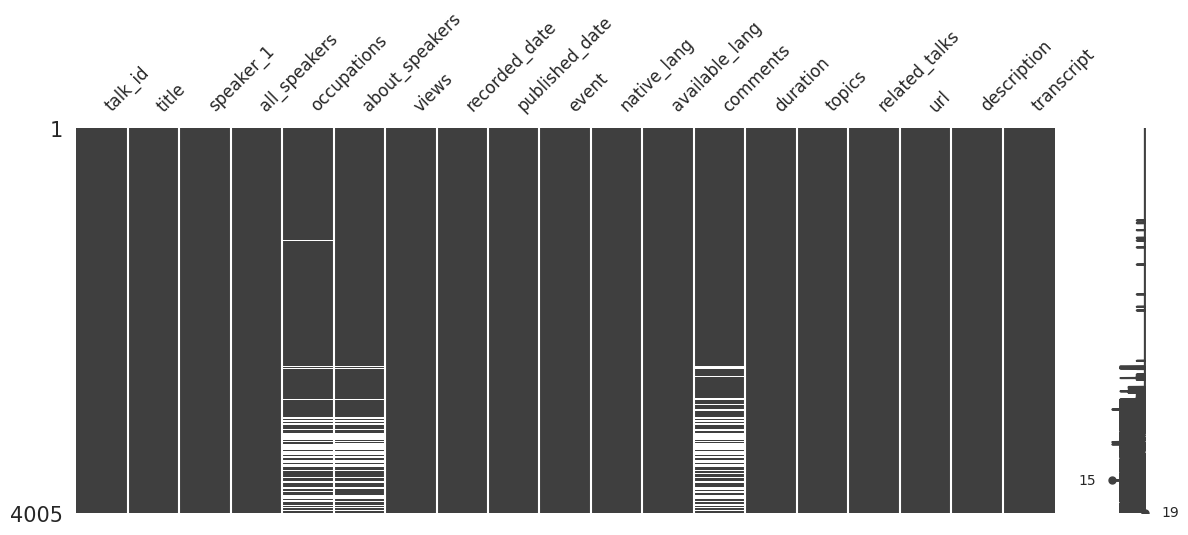

In [63]:
# Visualizing the missing values.
msno.matrix(dataset, figsize = (14,5), fontsize = 12)

### What did you know about your dataset?

This dataset contains 4005 observation with 19 features in which it has some null values in comments, occupations and about_speakers. Whereas all_speakers have four and recorded_date has only one null values. It has 15 categorical and 4 numerical columns.

## ***2. Understanding The Variables***

In [64]:
# Dataset columns.
dataset.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [65]:
# Numerical columns.
num_col = dataset.select_dtypes(exclude = 'object').columns
print(num_col)
print(f'There are {len(num_col)} numerical columns in this dataset.')

Index(['talk_id', 'views', 'comments', 'duration'], dtype='object')
There are 4 numerical columns in this dataset.


In [66]:
# Categirical columns.
cat_col = dataset.select_dtypes(include = 'object').columns
print(cat_col)
print(f' There are {len(cat_col)} categorical columns in this dataset.')

Index(['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers',
       'recorded_date', 'published_date', 'event', 'native_lang',
       'available_lang', 'topics', 'related_talks', 'url', 'description',
       'transcript'],
      dtype='object')
 There are 15 categorical columns in this dataset.


### Variables Description

**talk_id :-** Unique identification of talk provided by TED.

**title :-** Title of the topic discussed.

**speaker_1 :** First speaker.

**all_speakers :-** Name of all the speakers.

**occupations :-** Occupation of the speakers.

**about_speakers :-** About the speakers.

**views :-** Total number of views.

**recorded_date :-** Date of recording the videos.

**published_date :-** Published date of recorded videos.

**event :-** Event or medium in which the talk was given.

**native_lang :-** Original language in which the talk was given.

**available_lang :-** All available languages (lang_code) for a talk.

**comments :-** Total counts of comments on a talk.

**duration :-** Duration of talk in seconds.

**topics :-** Related tags or topics for the talk

**related_talks :-** Related talks present.

**url :-** Url of the talk.

**description :-** Descreiption of the talk.

**transcript :-** Full transcript of the talk.

###**Target Variable :- Views**

In [67]:
# Dataset description.
dataset.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [68]:
# Function to get a better summary of the data.
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    return summary
result = resumetable(dataset)

Dataset Shape: (4005, 19)


In [69]:
# Brief summary of the data.
result.sort_values('Missing', ascending= False)

,Name,dtypes,Missing,Uniques,First Value,Second Value
12,comments,float64,655,601,272.0,628.0
4,occupations,object,522,2049,{0: ['climate advocate']},{0: ['global health expert; data visionary']}
5,about_speakers,object,503,2977,{0: 'Nobel Laureate Al Gore focused the world’...,"{0: 'In Hans Rosling’s hands, data sings. Glob..."
3,all_speakers,object,4,3306,{0: 'Al Gore'},{0: 'Hans Rosling'}
7,recorded_date,object,1,1334,2006-02-25,2006-02-22
0,talk_id,int64,0,4005,1,92
17,description,object,0,4005,With the same humor and humanity he exuded in ...,You've never seen data presented like this. Wi...
16,url,object,0,4005,https://www.ted.com/talks/al_gore_averting_the...,https://www.ted.com/talks/hans_rosling_the_bes...
15,related_talks,object,0,4005,"{243: 'New thinking on the climate crisis', 54...","{2056: ""Own your body's data"", 2296: 'A visual..."
14,topics,object,0,3977,"['alternative energy', 'cars', 'climate change...","['Africa', 'Asia', 'Google', 'demo', 'economic..."


In [70]:
# Description of categorical features.
dataset.describe(include='object').T

,count,unique,top,freq
title,4005,4005,Averting the climate crisis,1
speaker_1,4005,3274,Alex Gendler,34
all_speakers,4001,3306,{0: 'Alex Gendler'},34
occupations,3483,2049,{0: ['writer']},53
about_speakers,3502,2977,{0: 'Alex Rosenthal takes everyday experiences...,10
recorded_date,4004,1334,2017-04-24,97
published_date,4005,2962,2017-09-07,27
event,4005,459,TED-Ed,556
native_lang,4005,12,en,3957
available_lang,4005,3902,['en'],24


### Checking Unique Values for each variable.

In [71]:
# Unique values for each variable.
all_unique_speakers = dataset['all_speakers'].nunique()
first_unique_speaker = dataset['speaker_1'].nunique()
unique_topics = dataset['topics'].nunique()
unique_title = dataset['title'].nunique()
unique_event = dataset['event'].nunique()
unique_native_lang = dataset['native_lang'].nunique()
print(f'This dataset has {all_unique_speakers} all unique speakers, {first_unique_speaker} first unique speakers, {unique_title} unique titles, {unique_topics} unique topics, {unique_event} unique events, and {unique_native_lang} unique native languages.')

This dataset has 3306 all unique speakers, 3274 first unique speakers, 4005 unique titles, 3977 unique topics, 459 unique events, and 12 unique native languages.


##***3. Data Wrangling***

In [72]:
# Dataset copy.
data = dataset.copy()

In [73]:
# Shape
data.shape

(4005, 19)

In [74]:
# Null value counts.
data.isnull().sum().sort_values(ascending = False)

comments          655
occupations       522
about_speakers    503
all_speakers        4
recorded_date       1
talk_id             0
description         0
url                 0
related_talks       0
topics              0
duration            0
event               0
available_lang      0
native_lang         0
title               0
published_date      0
views               0
speaker_1           0
transcript          0
dtype: int64

In [75]:
# Filling null values for EDA.
data.fillna({'all_speakers':'name_absent', 'occupations': 'details not given', 'about_speakers': 'details not available', 'comments': 0, 'recorded_date':'0000-00-00'}, inplace = True)

In [76]:
# Checking the null values again.
data.isnull().sum().sum()

0

### Extracting day and month from published_date.

In [77]:
# Checking the data type.
print(data['published_date'].dtype)

object


In [78]:
# Converting published date into datetime data type.
data['published_date'] = pd.to_datetime(data['published_date'], format = "%Y-%m-%d")

In [79]:
# Ensuring the dtype of published_date.
print(data['published_date'].dtype)

datetime64[ns]


In [80]:
# range of time period for which the data has been collected.
start_date = data['published_date'].min()
end_date = data['published_date'].max()
print(f'The starting date of collecting the TED data is {start_date} and the ending is {end_date}.')

The starting date of collecting the TED data is 2006-06-27 00:00:00 and the ending is 2020-04-30 00:00:00.


In [81]:
# Extracting the date parts from published date.
data['published_year'] = data.published_date.dt.year
data['published_month'] = data.published_date.dt.month
data['published_day'] = data.published_date.dt.day

In [82]:
# Adding a new feature with number of available languages for a talk.
data['num_of_lang'] = data['available_lang'].apply(lambda x: len(ast.literal_eval(x)))

In [83]:
# adding a new features which consist the total number of topics count.
data['num_of_tags'] = data['topics'].apply(lambda x: len(ast.literal_eval(x)))

In [84]:
data.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,topics,related_talks,url,description,transcript,published_year,published_month,published_day,num_of_lang,num_of_tags
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,6,27,43,9
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,...,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2006,6,27,49,11


In [85]:
data.shape

(4005, 24)

In [86]:
data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'published_year',
       'published_month', 'published_day', 'num_of_lang', 'num_of_tags'],
      dtype='object')

### What all manipulations have you done and insights you found?

First i made a copy of the original dataset, then i checked for null values and filled that through fill na method. I also extracted the date, month and year from published_date. At last i checked some of the categorical data type individually by calling their index and found that they are string list. So i converted them into their original type by removing string format through ast.literal_eval. I did all this to extract more insights easily.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###**Univariate Analysis.**

###Top Languages.

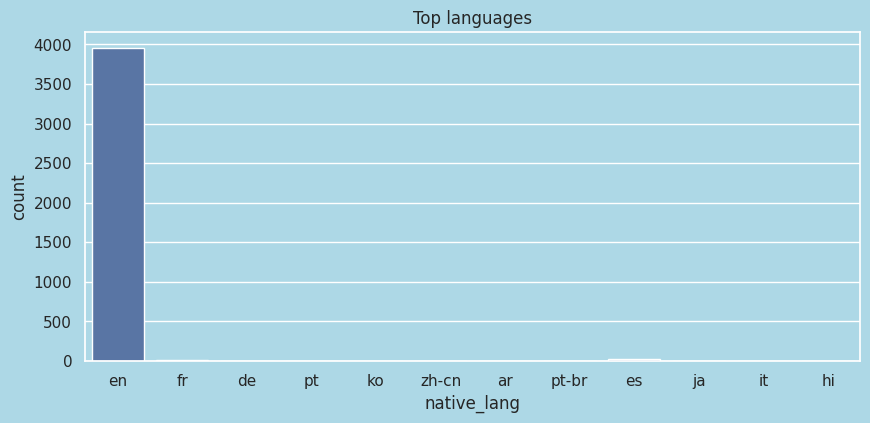

In [87]:
# Top Languages.
sns.set(rc={'figure.figsize':(10.0,4.27)})
title = 'Top languages'
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
sns.countplot(x = 'native_lang', data = data)
plt.title(title)
plt.show()

##### 1. Why did you pick the specific chart?

I picked countplot here because it is very useful when it comes to do univariate analysis based on value counts of the variables.

##### 2. What are the insights found from the chart?

Through this chart we can say that the native language of most talks are given in english.

##### 3. Will the gained insights help creating a positive business impact?

Yes, it helps in creating a positive business impact. if the native language of the talk would be english then it can increase the number of views. we'll see it further that which language is creating more impact on views.

###Top Events.

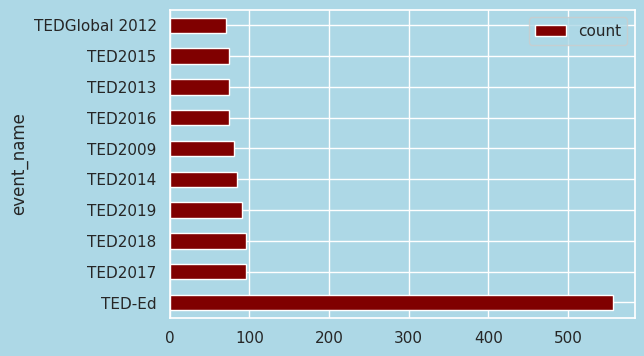

In [88]:
# Top ten Events.
top_events = data['event'].value_counts().sort_values(ascending=False).head(10)
top_events_df = pd.DataFrame(top_events).reset_index()
top_events_df.columns = ['event_name', 'count']
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
top_events_df.plot(kind='barh', x='event_name', y='count', color='maroon',figsize=(6,4))
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart gives a better visualization when it comes to visualize the smaller dataset. Here i'm visualizing only top ten events present in TED, that is why i picked this chart.

##### 2. What are the insights found from the chart?

We can see  top ten events in the chart through which most of the talk given. According to this TED-ED is the best event followed by TED 2017 and TED 2018.

##### 3. Will the gained insights help creating a positive business impact?

Yes, beacause if a talk gets the best event it can attract more viewers.

###Years with total number of published video.

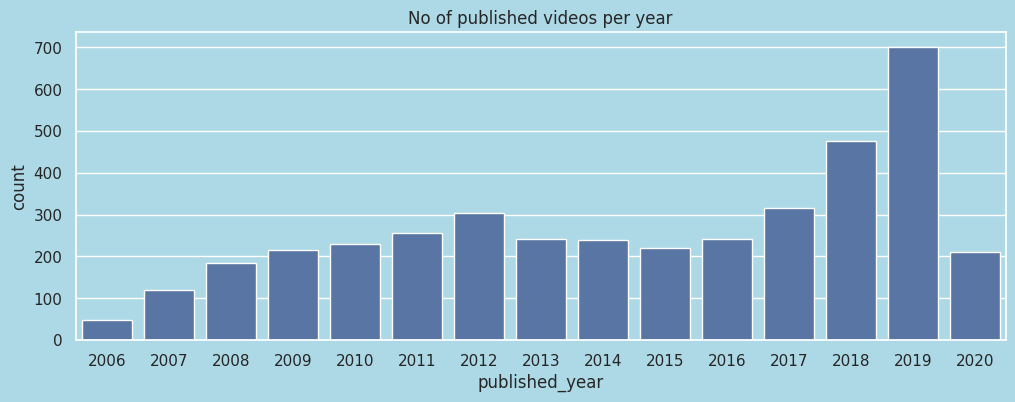

In [89]:
# Best year.
sns.set(rc={'figure.figsize':(12,4)})
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
sns.countplot(x='published_year', data=data)
plt.title('No of published videos per year')
plt.show()

##### 1. Why did you pick the specific chart?

As i said earlier that the reason of using this beacause a countplot is very useful when it comes to visualize the value counts of a variable. it also giveas an attractive visualization.

##### 2. What are the insights found from the chart?

Through this chart we can say that most videos are published in year 2019 followed by 2018 and 2017.

##### 3. Will the gained insights help creating a positive business impact?

I think this only shows the total number of videos published in different years. it's not make that much impact on buisness, beside of this all we can do is increase the number of published videos based on viewers intrest to rertain them and also grab the new viewers.

###**Biavariate Analysis.**

###Top 10 speakers.

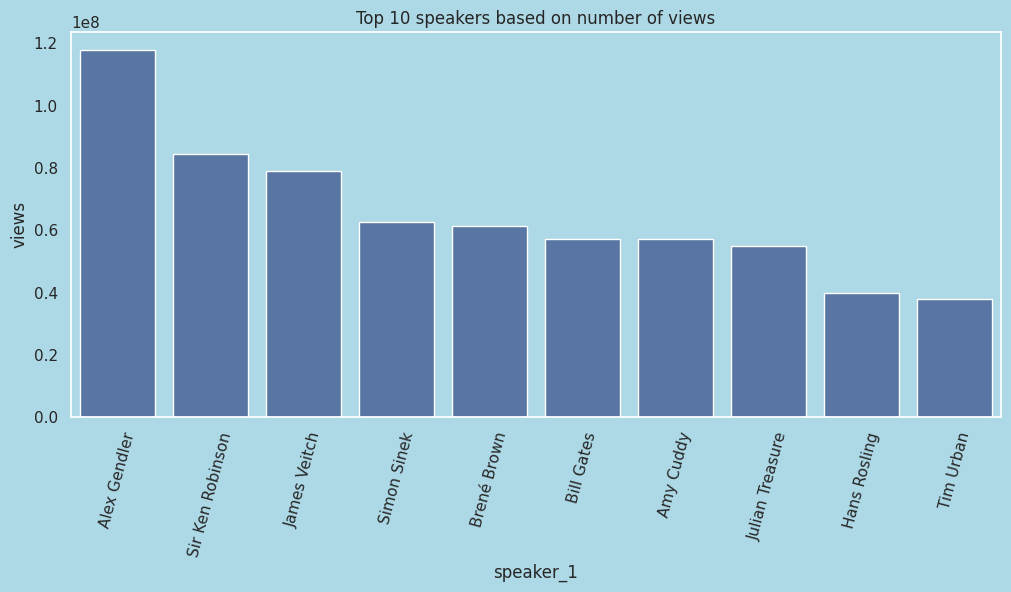

In [90]:
# Speakers vs number of views.
spk_views = data.groupby('speaker_1')['views'].sum().sort_values(ascending=False).reset_index()[:10]
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.figure(figsize=(12.0,5.0))
ax=sns.barplot(x='speaker_1', y='views',data= spk_views)
plt.setp(ax.get_xticklabels(), rotation=75);
plt.title('Top 10 speakers based on number of views')
ax.grid(False)
plt.show()

##### 1. Why did you pick the specific chart?

I picked this bar chart here because it gives a better visualization when we visualize two variables. Through this visualization we can see the top 10 speakers based on total number of views.

##### 2. What are the insights found from the chart?

We can see in the chart that Alex Gendler has got the highest number of views followed by Sir Ken Robinson, James Veitch and so on.

##### 3. Will the gained insights help creating a positive business impact?

Yes,  this insights helps in creating a positive business impact.

###Top speakers based on average views.

In [91]:
# Top speakers with respect to average views.
pop_speakers = data.groupby('speaker_1')['views'].mean().sort_values(ascending=False).reset_index()[:10]
n = 10
pal = list(sns.color_palette(palette='Reds_r', n_colors=n).as_hex())

import plotly.express as px
fig = px.pie(pop_speakers[0:10], values='views', names='speaker_1',
             color_discrete_sequence=pal)

fig.update_traces(title = 'Top 10 speakers based on average views', textposition='outside', textinfo='percent+label',
                  hole=.6, hoverinfo="label+percent+name")

fig.update_layout(width = 1000, height = 400,
                  margin = dict(t=0, l=0, r=0, b=0))
fig.show()

##### 1. Why did you pick the specific chart?

I picked this pie chart from plotly here beacause i wanted to see the top 10 speakers based on average (in percentage of total average views) views.

##### 2. What are the insights found from the chart?

This chart shows the top ten speakers based on average views in which Ammy Cuddy has the most average views (16% of total average views) followed by Jmaes Vietch (11% of total average views), Tim Urban has 10.6% of total average views and so on.

##### 3. Will the gained insights help creating a positive business impact?

Yes, through this we can predict the probablity of getting views based on top speakers through our ml model.

###Top Speakers VS average comments.

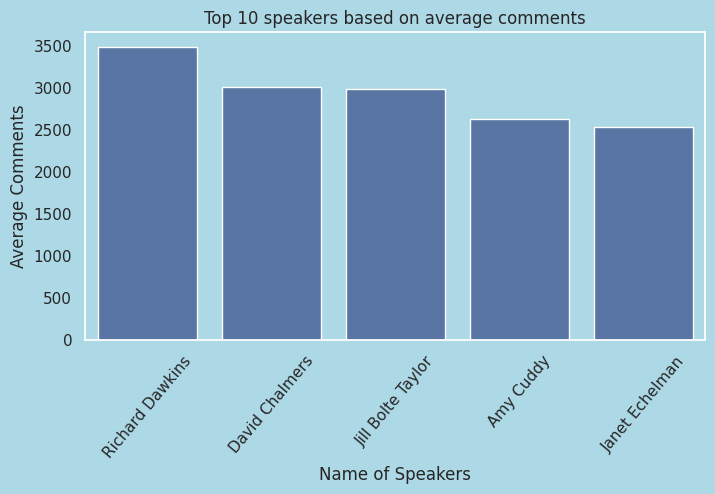

In [92]:
# Top 10 speakers based on average comments.
top_10_speakers = data.groupby('speaker_1')['comments'].mean().sort_values(ascending=False)[:5].reset_index()
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.figure(figsize=(8,4))
ax=sns.barplot(x='speaker_1', y='comments',data=top_10_speakers)
plt.setp(ax.get_xticklabels(), rotation=50);
ax.set(xlabel = 'Name of Speakers', ylabel = 'Average Comments', title = 'Top 10 speakers based on average comments')
# plt.title('Top 10 speakers based on average comments')
ax.grid(False)
plt.show()

##### 1. Why did you pick the specific chart?

I picked this bar chart here beacause i wanted to see two variables, and bar chart gives attractive visualization when we've to see two variables on a single chart through bars.

##### 2. What are the insights found from the chart?

Through this chart i visualized the top 5 speakers based on average comments. From this vizualization i found that Richard Dawkins got the highest average comments (approximately 3500) followed by David Chaimers, Jill Bolte Taylor, etc.

##### 3. Will the gained insights help creating a positive business impact?

yes, it helps in creating positive business impact.

###Top titles.

In [93]:
# Top ten titles based on views.
top_10_titles = data.groupby('title')['views'].sum().sort_values(ascending=False).reset_index()[:10]

In [94]:
# converting the views into millions.
top_10_titles['views in million'] = round(top_10_titles['views']/1000000, 1)

In [95]:
# top_10_titles.drop('views in million', axis = 1, inplace  = True)

In [96]:
top_10_titles

,title,views,views in million
0,Do schools kill creativity?,65051954,65.1
1,Your body language may shape who you are,57074270,57.1
2,This is what happens when you reply to spam email,56932551,56.9
3,How great leaders inspire action,49730580,49.7
4,The power of vulnerability,47544833,47.5
5,How to speak so that people want to listen,41504331,41.5
6,Inside the mind of a master procrastinator,37976820,38.0
7,"Looks aren't everything. Believe me, I'm a model.",33874546,33.9
8,My philosophy for a happy life,33691484,33.7
9,The next outbreak? We're not ready,33521780,33.5


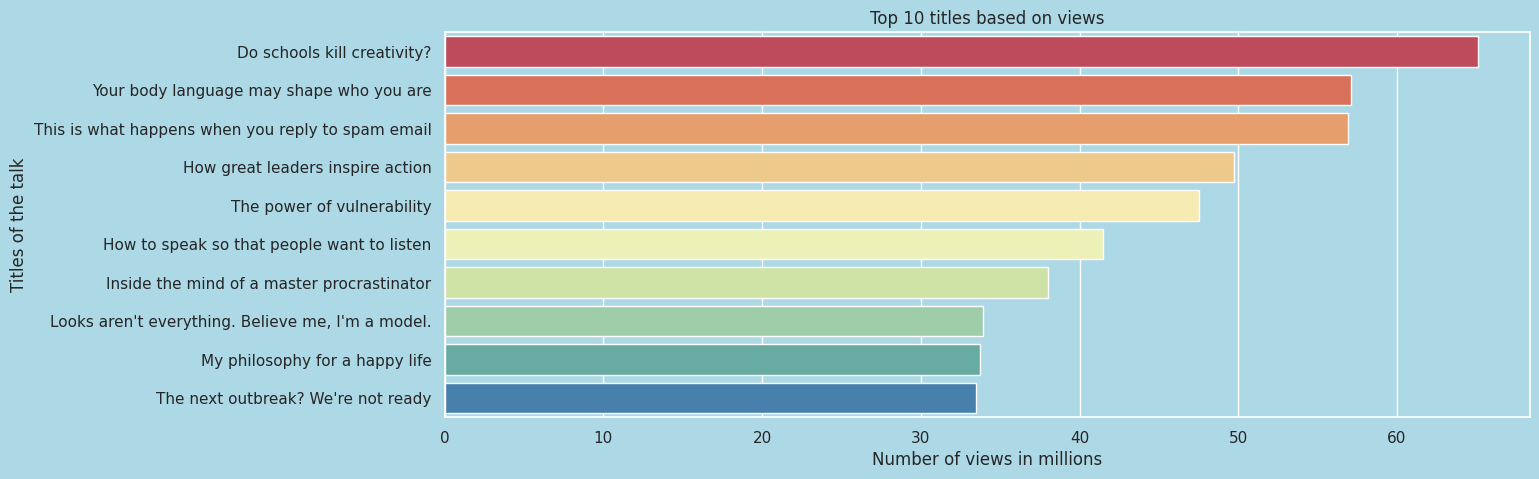

In [97]:
# visulization.
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
plt.rcParams["figure.figsize"] = (14,5)
plot = sns.barplot(x=top_10_titles['views in million'],y='title',data=top_10_titles,palette='Spectral')
plot.set(xlabel = 'Number of views in millions', ylabel = 'Titles of the talk', title = 'Top 10 titles based on views')
plt.show()

##### 1. Why did you pick the specific chart?

I used again a bar plot here to visualize the top ten titles based on total number of views. I picked this chart because as i said earlier that bar plot gives you better visualization through it's bars.

##### 2. What are the insights found from the chart?

Through this chart i have seen the top ten titles based on total number of views.

##### 3. Will the gained insights help creating a positive business impact?

Yes, because having good or catchy titles attract the viewers to click and increases the number of views.

###Top topics.

In [98]:
# Topics has 4005 unique counts, so i'm visualizing top topics based on total comments.
# Top topics based on total number of comments.
top_10_topics = data.groupby('topics')['comments'].sum().sort_values(ascending=False).reset_index()[:10]
fig = px.treemap(top_10_topics[0:10], path=[px.Constant("Top ten topics based on total number of comments."), 'topics'],
                 values='comments',
                 color='comments',
                 color_continuous_scale='viridis',
                #  color_continuous_midpoint=np.average(top_10_topics['topics'])
                )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

##### 1. Why did you pick the specific chart?

I used treemap here to visualize the top ten topic based on total number of comments because treemap is very useful when it comes to visualize words list or sentences.

##### 2. What are the insights found from the chart?

Through this chart i have found the top ten topics based on total number of comments.

##### 3. Will the gained insights help creating a positive business impact?

Yes, it gives the idea of topics to choose for talks to get more views.

There are 822 words in the combination of all topics.


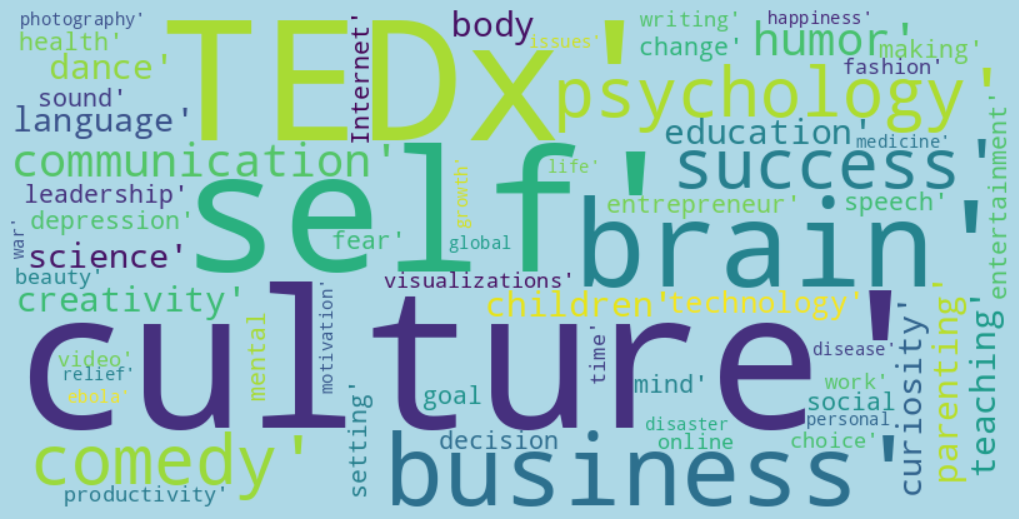

In [99]:
# top topics based on total views.
top_topics = data.groupby('topics')['views'].sum().sort_values(ascending=False).reset_index()[:10]
# Most used words in top topics.
from wordcloud import WordCloud
# making of word cloud from title column
text = " ".join(topic for topic in top_topics.topics.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="lightblue", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (12,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

I picked wordcloud here, because it is very useful to see the most frequent words. Through this i wanted to see the words which is used maximum number of times in topics.

##### 2. What are the insights found from the chart?

Through this chart i visualized the most frequent words in top ten topics based on total number of views. According to this culture, business, brain, self, science, TED X, etc are the most frequent words.

##### 3. Will the gained insights help creating a positive business impact?

Yes, it helps in creating positive business impact. Through this we are aware to make a talk with the combination of most frequent words in order to get more and more views.

###Months with respect to average views.

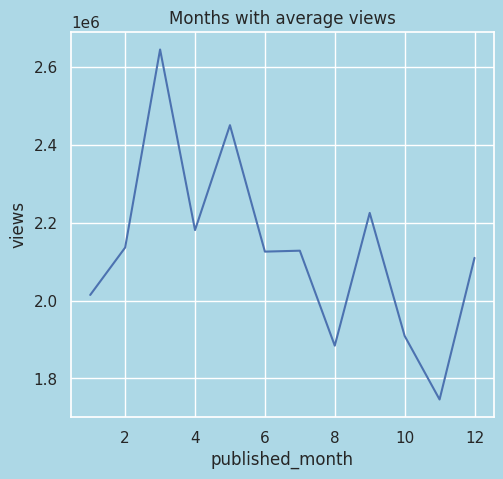

In [100]:
# high viewership months wrt average views.
monthly_avg_views = data.groupby('published_month')['views'].mean().sort_values(ascending = False).reset_index()
plt.subplot(1,2,2)
plt.title('Months with average views')
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
sns.lineplot(x='published_month',y='views',data=monthly_avg_views)
plt.show()

##### 1. Why did you pick the specific chart?

I picked line chart here beacause line charts is also very interactive. So i wanted to see which monts is getting the highest average views.

##### 2. What are the insights found from the chart?

According to above visualization through line chart i found that month 3rd and fifth are getting the highest average views.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the gained insights will help in creating a positive business impact.

##***5. Data Cleaning***

###Handling Outliers.

In [101]:
data.select_dtypes(exclude = 'object').columns

Index(['talk_id', 'views', 'published_date', 'comments', 'duration',
       'published_year', 'published_month', 'published_day', 'num_of_lang',
       'num_of_tags'],
      dtype='object')

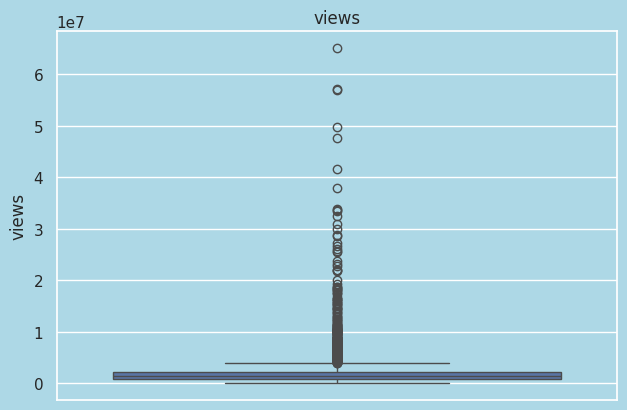

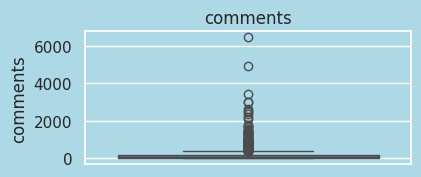

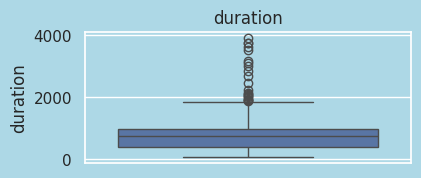

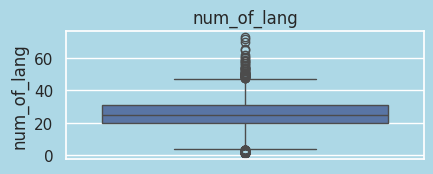

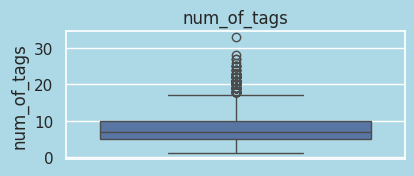

In [102]:
# Column outliers.
columns = ['views', 'comments', 'duration', 'num_of_lang', 'num_of_tags']

n = 1
plt.figure(figsize=(18,12))

for i in columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
  sns.boxplot(data[i])
  plt.title(i)
  plt.tight_layout()
  plt.show()

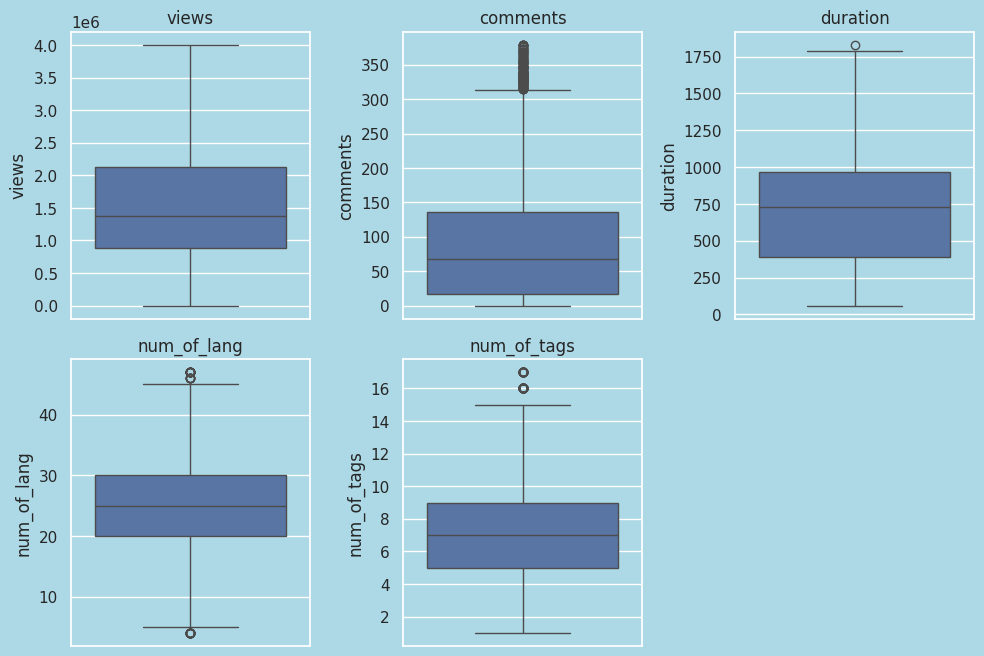

In [103]:
# Treatment of outliers through quantile based mapping.
columns = ['views', 'comments', 'duration', 'num_of_lang', 'num_of_tags']
for i in columns:
  iqr =  data[i].quantile(0.75)-data[i].quantile(0.25)
  data[i]= data[i].mask(data[i]>(data[i].quantile(0.75)+1.5*iqr), data[i].mean())
  data[i]= data[i].mask(data[i]<(data[i].quantile(0.25)-1.5*iqr), data[i].mean())
# for i in columns:
#   iqr =  data[i].quantile(0.75)-data[i].quantile(0.25)

  n = 1
plt.figure(figsize=(10,10))

for i in columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
  sns.boxplot(data[i])
  plt.title(i)
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the quantile method to find the interquartile range. i found 75th percentile (q3) and 25th percentile (q1) and subtracted q1 from q3 to get the iqr and removed the rest by taking the average.

In [104]:
# Checking the assumption of linear regression.
numeric_features = data.describe().columns
numeric_features

Index(['talk_id', 'views', 'comments', 'duration', 'published_year',
       'published_month', 'published_day', 'num_of_lang', 'num_of_tags'],
      dtype='object')

## ***6. Feature Engineering & Data Pre-processing***

###  **Feature Engineering**

###Distributiob of target variable (views).

<Axes: xlabel='views', ylabel='Density'>

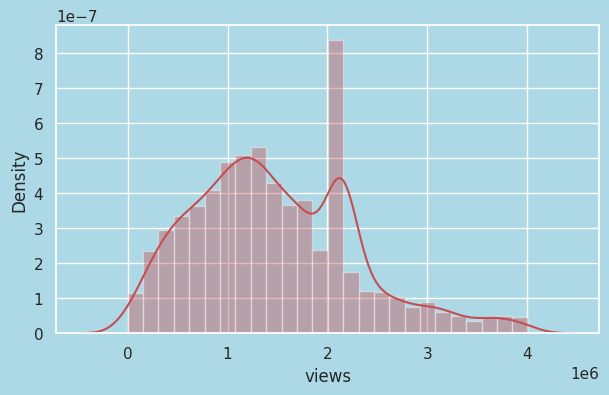

In [105]:
# Distribution of views through distplot.
plt.figure(figsize=(7,4))
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
sns.distplot(data['views'],color="r")

In [106]:
# Skewness.
data['views'].skew()

0.5905794882824926

###Numerical features distributions.

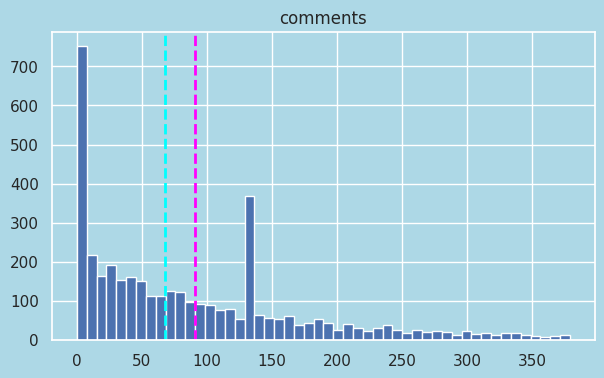

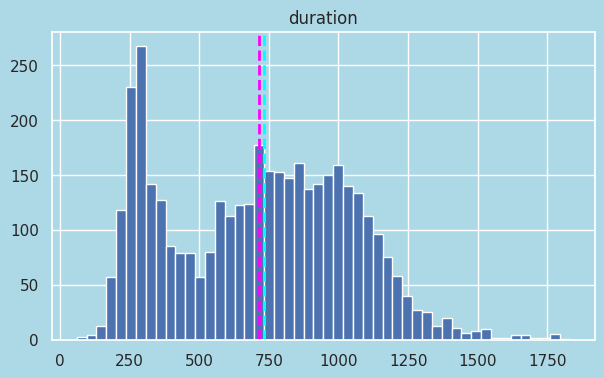

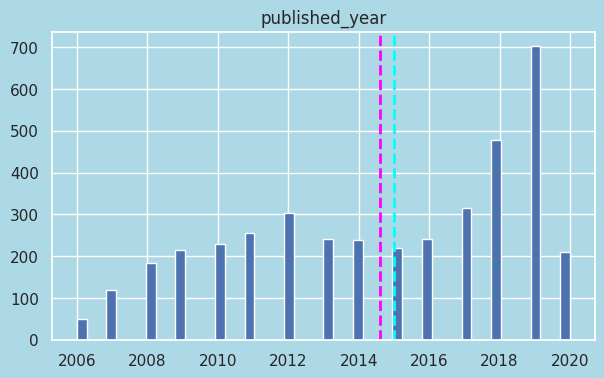

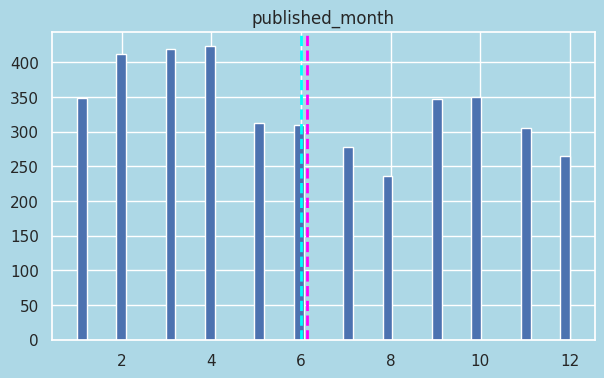

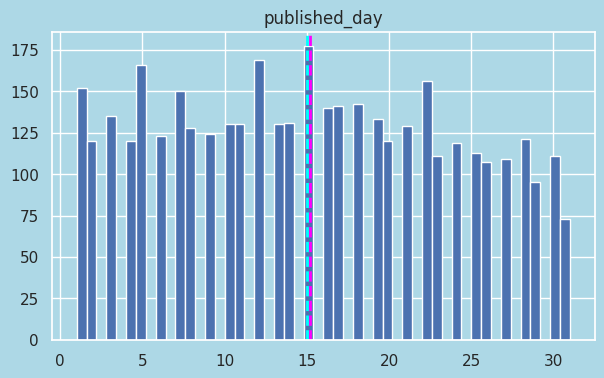

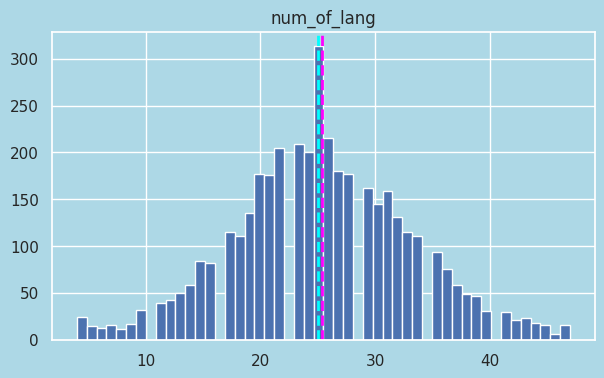

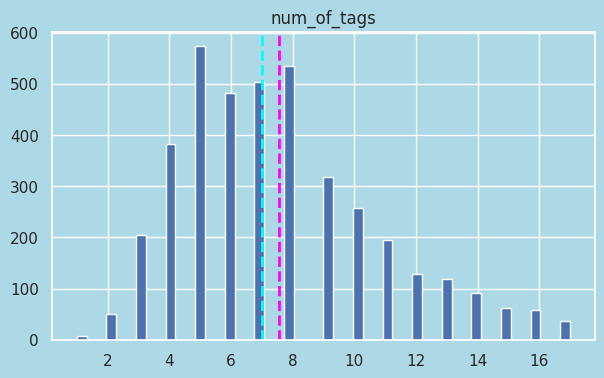

In [107]:
for col in numeric_features[2:]:
    fig = plt.figure(figsize=(7, 4))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

###Linear Relation with dependent variable.

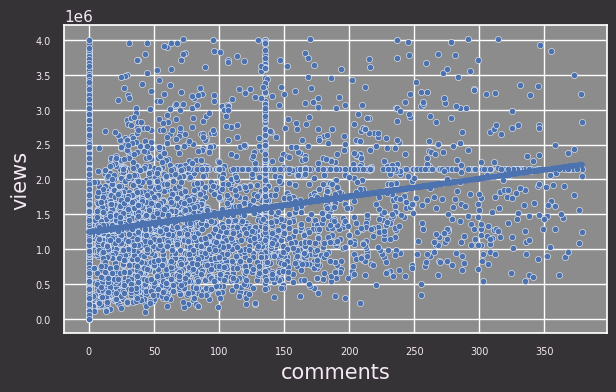

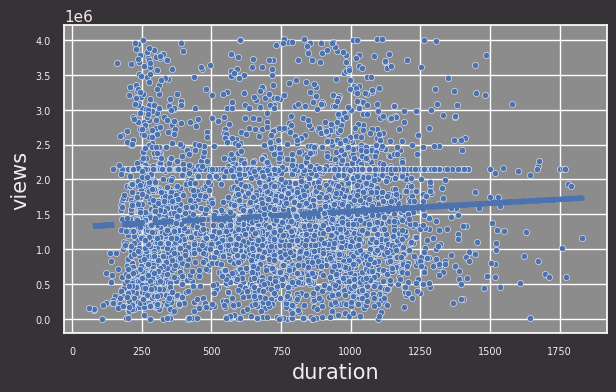

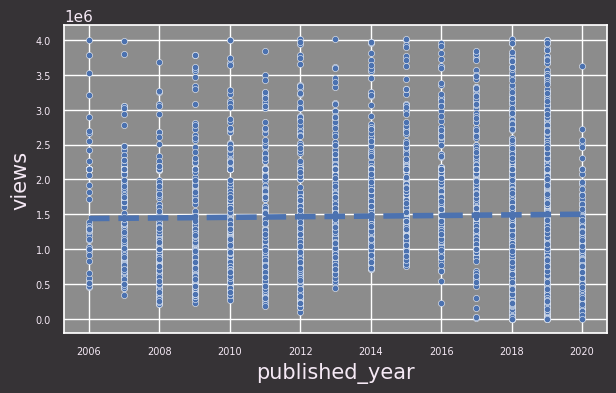

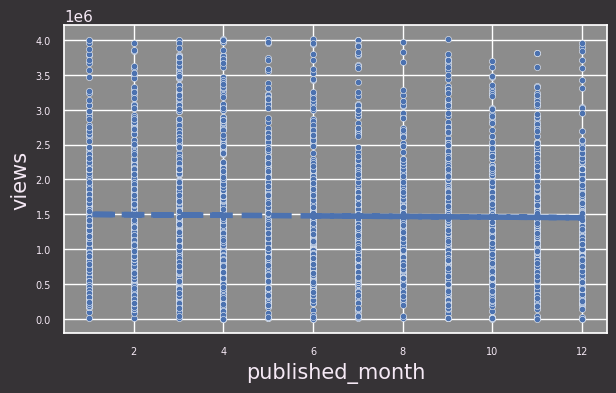

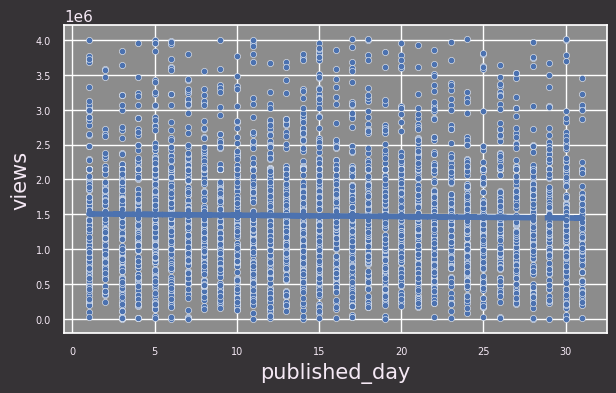

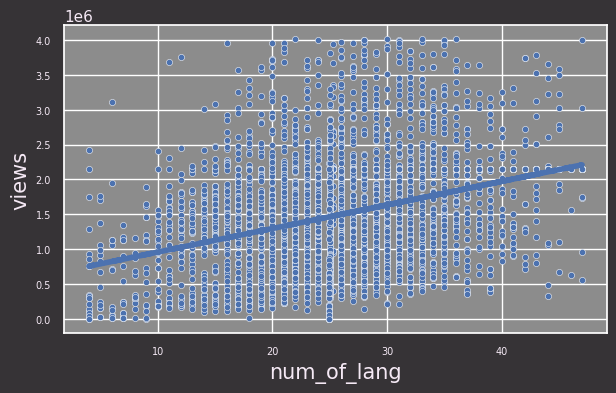

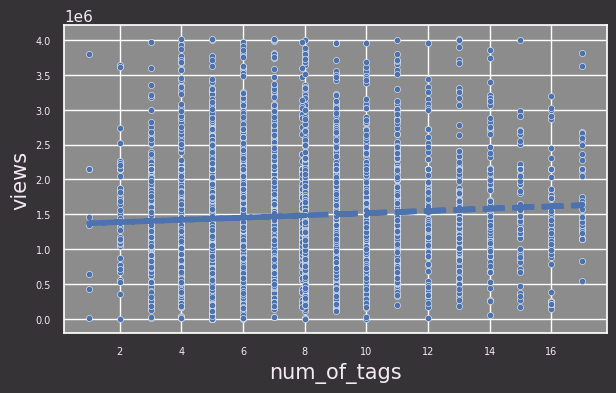

In [108]:
# Creating scatterplot to determine the co-relation
for col in (numeric_features[2:]):
  fig, ax = plt.subplots(figsize=(7,4),facecolor="#363336")
  ax.patch.set_facecolor('#8C8C8C')

  sns.scatterplot(data = data, x = col ,  y = 'views' ,s=20,palette=["pink","grey","black","red"], ax =ax)

  z = np.polyfit(data[col], data['views'], 1)  # creating best fit line
  y_hat = np.poly1d(z)(data[col])
  plt.plot(data[col], y_hat, "b--", lw=4)

  ax.tick_params(axis='x', colors='#F5E9F5',labelsize=7)
  ax.tick_params(axis='y', colors='#F5E9F5',labelsize=7)
  ax.set_xlabel(col, color='#F5E9F5', fontsize=15)
  ax.set_ylabel("views",  color='#F5E9F5', fontsize=15)

###Checkig for correlation.

<Axes: >

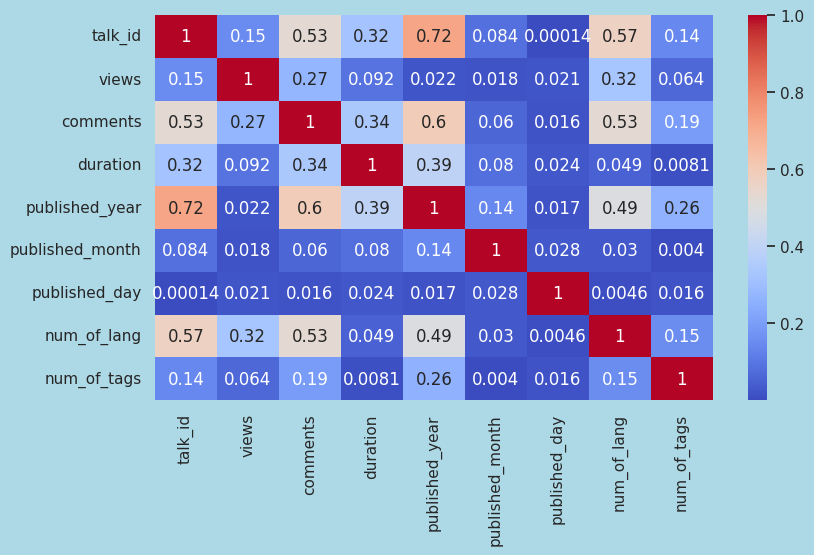

In [109]:
# Correlation.
plt.figure(figsize=(9,5))
correlation = data.corr()
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

###Dealing with multicollinearity.

In [110]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [111]:
numeric_features

Index(['talk_id', 'views', 'comments', 'duration', 'published_year',
       'published_month', 'published_day', 'num_of_lang', 'num_of_tags'],
      dtype='object')

In [112]:
column_list = ['talk_id','views','published_year']

In [113]:
# Calculating varience inflation factor (VIF)
calc_vif(data[[i for i in data.describe().columns if i not in column_list]])

,variables,VIF
0,comments,3.293362
1,duration,5.501884
2,published_month,3.853032
3,published_day,3.765520
4,num_of_lang,9.119511
5,num_of_tags,5.387405


In [114]:
numerical_col = ['comments','duration','published_month','published_day','num_of_tags','num_of_lang']

###**Categorical encoding**

###Target Encoding.

In [115]:
# Target encoding on popular speaker.
popular_speaker=data.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
popular_speaker=popular_speaker.to_dict()
popular_speaker=popular_speaker.values()
popular_speaker=  list(popular_speaker)[0]
data['speaker_1_avg_views']=data['speaker_1'].map(popular_speaker)

In [116]:
#applying target encoding on event column
popular_event=data.groupby('event').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
popular_event=popular_event.to_dict()
popular_event=popular_event.values()
popular_event=  list(popular_event)[0]
data['event_wise_avg_views']=data['event'].map(popular_event)

###Label Encoding.

In [117]:
# Unique languages.
native_lang = data['native_lang'].unique()
native_lang

array(['en', 'fr', 'de', 'pt', 'ko', 'zh-cn', 'ar', 'pt-br', 'es', 'ja',
       'it', 'hi'], dtype=object)

In [118]:
# Label encoding on languages.
label_encoder = LabelEncoder()
data['native_lang'] = label_encoder.fit_transform(data['native_lang'])

In [119]:
data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'published_year',
       'published_month', 'published_day', 'num_of_lang', 'num_of_tags',
       'speaker_1_avg_views', 'event_wise_avg_views'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

I did target encoding and label encoding in order to convert the categorical data into numericals, to get the best prediction through my machine learning model.

In [120]:
# Copy of the data.
df = data.copy()

In [121]:
# Droping the useless columns.
df.drop(['talk_id','title','speaker_1','all_speakers','occupations','about_speakers','recorded_date',
         'published_date','event','available_lang','topics','related_talks','url', 'description', 'transcript', 'published_year',], inplace = True, axis = 1)

In [122]:
df.shape

(4005, 10)

In [123]:
df.columns

Index(['views', 'native_lang', 'comments', 'duration', 'published_month',
       'published_day', 'num_of_lang', 'num_of_tags', 'speaker_1_avg_views',
       'event_wise_avg_views'],
      dtype='object')

### **Data Preprocessing**

###Independent and target variable separation.

In [124]:
# Dependent variables.
independent_variables = df.columns[1:]
print(f'List of independent variables = {list(independent_variables)}.')
# Target variable.
target_variable = df.columns[0]
print(f'{target_variable} are the target variable.')

List of independent variables = ['native_lang', 'comments', 'duration', 'published_month', 'published_day', 'num_of_lang', 'num_of_tags', 'speaker_1_avg_views', 'event_wise_avg_views'].
views are the target variable.


###Feature scaling.

In [125]:
# checking the range of the features.
df[independent_variables].describe().loc[['min','max']]

,native_lang,comments,duration,published_month,published_day,num_of_lang,num_of_tags,speaker_1_avg_views,event_wise_avg_views
min,0.0,0.0,60.0,1.0,1.0,4.0,1.0,0.0,15700.0
max,11.0,379.0,1831.0,12.0,31.0,47.0,17.0,4006448.0,4003824.0


In [126]:
# Scaling the independent features.
scaler = StandardScaler()
scaler.fit_transform(df[independent_variables])
df[independent_variables] = scaler.transform(df[independent_variables])

In [127]:
# now checking the range again.
df[independent_variables].describe().loc[['min','max']]

,native_lang,comments,duration,published_month,published_day,num_of_lang,num_of_tags,speaker_1_avg_views,event_wise_avg_views
min,-6.368230,-1.032540,-1.986031,-1.478803,-1.650285,-2.723503,-2.035256,-1.977069,-3.958070
max,28.237961,3.294623,3.393379,1.694846,1.833048,2.763715,2.934770,3.379775,6.831783


##### Which method have you used to scale you data and why?

I used StandardScalor() method to minimise the range of independent features so that it will help the optimization function converge faster that result in quick learning of the model.

###Target variable transformation.

<Axes: ylabel='Density'>

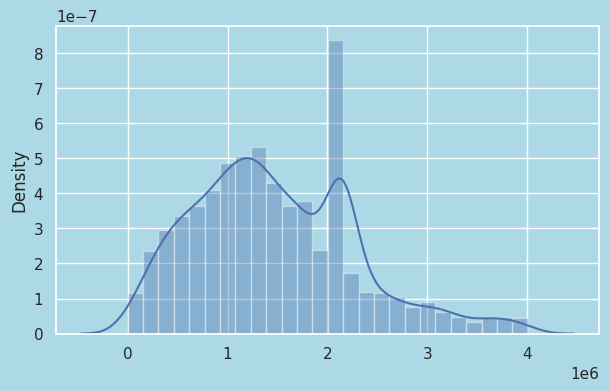

In [128]:
# checking the distribution of target variable.
plt.figure(figsize=(7,4))
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
sns.distplot(x=df['views'])

In [129]:
# Applying square root transformnation.
df['views'] = np.sqrt(df['views'])

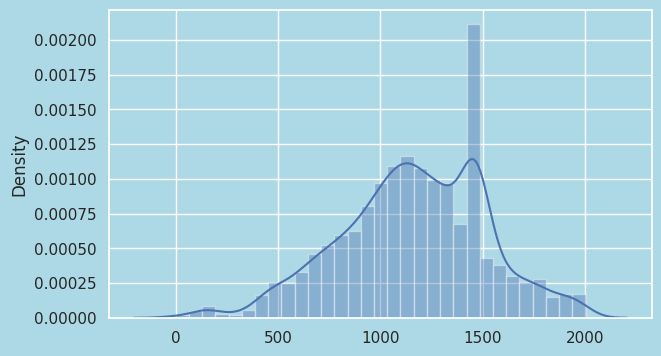

In [130]:
# Visualization after transformation.
plt.figure(figsize=(7,4))
sns.distplot(x = df['views'])
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})

In [131]:
df.isnull().sum()

views                   0
native_lang             0
comments                0
duration                0
published_month         0
published_day           0
num_of_lang             0
num_of_tags             0
speaker_1_avg_views     0
event_wise_avg_views    0
dtype: int64

###Splitting the data into train test.

In [132]:
df.columns

Index(['views', 'native_lang', 'comments', 'duration', 'published_month',
       'published_day', 'num_of_lang', 'num_of_tags', 'speaker_1_avg_views',
       'event_wise_avg_views'],
      dtype='object')

In [133]:
# data splitting.
X = df.drop(columns = 'views')
y = df['views']

In [134]:
X.shape

(4005, 9)

In [135]:
y.shape

(4005,)

In [136]:
# Applying train test and split.
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(3204, 9)
(801, 9)


## ***7. ML Model Implementation***

###**ML Model - 1**
###**Linear Regression Model**

In [137]:
# Fitting the linear regression to the training dataset.
reg = LinearRegression().fit(X_train, y_train)
# predicting the y value from testing dataset.
y_pred = reg.predict(X_test)

####Model Evaluation.

In [138]:
# Evaluation metrics.
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X.shape[1]-1)))

MSE : 22450.290514725068
RMSE : 149.83421009477465
R2 : 0.8184628380725125
Adjusted R2 :  0.8163973077850949


In [139]:
dataset['views'].mean()

2148005.5737827714

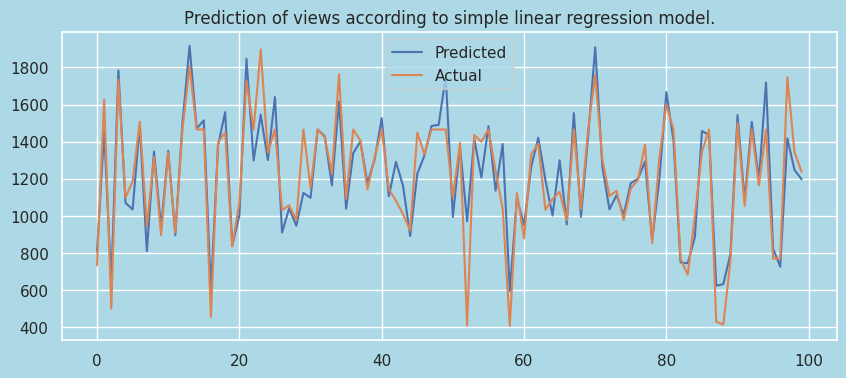

In [140]:
# visualisation of predicted and actual.
plt.figure(figsize=(10,4))
plt.plot(y_pred[:100])
plt.plot(np.array(y_test[:100]))
plt.legend(["Predicted","Actual"])
plt.title("Prediction of views according to simple linear regression model.")
plt.show()

####Regularised technique.

In [141]:
# Applying L1 norm (Lasso).
lasso  = Lasso(alpha=0.005 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.005, max_iter=3000)

In [142]:
# checking the score on training data.
lasso.score(X_train, y_train)

0.8337231331754031

In [143]:
# checking the score on testing data.
lasso.score(X_test, y_test)

0.8184645132311219

####Cross validation and hyperparameter tuning.

In [144]:
# Applying cross validation.
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [145]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -21427.874204293727


In [146]:
# optimal model.
lasso_optimal = lasso_regressor.best_estimator_

In [147]:
# predicting the unseen data (x test).
y_pred_lasso = lasso_optimal.predict(X_test)
y_pred_lasso[:5]

array([ 808.47082562, 1455.01796904,  645.0785553 , 1785.24323499,
       1068.73185676])

In [148]:
# printing y test to compare manually.
print(y_test[:5])

3112     734.556329
2194    1626.419380
3733     501.944220
2970    1733.489833
2408    1099.007279
Name: views, dtype: float64


####Model evaluation.

In [149]:
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 22410.67414077734
RMSE : 149.70195102528672
R2 : 0.8187831833298538
Adjusted R2 :  0.8167212979315841


my model is performing good with simple linear regression and it is not overfitting. that is why it is giving the same result with regularised technique also. so i am not gonna apply any regularisation technique now.

###**ML Model - 2**
###**Random Forest Regressor**

In [150]:
#  Applying random forest regressor.
rf = RandomForestRegressor()
# fitting ther model.
rf.fit(X_train, y_train)
# prediction.
rf_y_pred = rf.predict(X_test)

In [151]:
# Evaluating the model.
mse = mean_squared_error(y_test, rf_y_pred)
r2 = r2_score(y_test, rf_y_pred)
adj_r2 = 1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("MSE: %.2f" % mse)
print('R2: %.2f' % r2)
print("Adjusted R2: %.2f" % adj_r2)

MSE: 20028.10
R2: 0.84
Adjusted R2: 0.84


####Cross validation and hyperparameter tuning.

####Defining the hyperparameter grid for the Random Forest Regressor.

In [152]:
#Random Forest Regressor parameter dictionary.
param_grid = {
    'n_estimators': [1000],
    'max_depth': [70, 80],
    'max_features': ['sqrt'],
    'min_samples_split': [2],
    'min_samples_leaf': [1,2]
}


####Initializing the Random Forest Regressor model.

In [153]:
# initializing the instance.
rf_reg = RandomForestRegressor()

In [154]:
# Initializing the Grid Search Cross-Validation.
rf_reg_grid = GridSearchCV(estimator = rf_reg, param_grid = param_grid, cv = 5, n_jobs = -1, verbose=2)

In [155]:
# Fiting the Grid Search Cross-Validation.
rf_reg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [70, 80], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [2],
                         'n_estimators': [1000]},
             verbose=2)

In [156]:
# Getting the best hyperparameters and the best score.
print("Best Hyperparameters:", rf_reg_grid.best_params_)
print("Best Score:", rf_reg_grid.best_score_)
print("Best Estimator", rf_reg_grid.best_estimator_)

Best Hyperparameters: {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000}
Best Score: 0.8632297860450537
Best Estimator RandomForestRegressor(max_depth=80, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=1000)


In [157]:
# estimator.
rf_reg_grid.best_estimator_

RandomForestRegressor(max_depth=80, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=1000)

In [158]:
optimal_model = rf_reg_grid.best_estimator_
y_pred = optimal_model.predict(X_test)

In [159]:
# fiting best hyperparameter to the Random Forest Regressor model.
# best_rf_reg = RandomForestRegressor(rf_reg_grid.best_estimator_)
# optimal_model = best_rf_reg.fit(X_train, y_train)
# y_pred = optimal_model.predict(X_test)

In [160]:
# Predicting the test data and evaluating the performance of the model.
# y_pred_rfcv = best_rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Adjusted R2 :",1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Mean Squared Error: 17357.37432155558
R-squared: 0.8596450914173466
Adjusted R2 : 0.8580481329126135


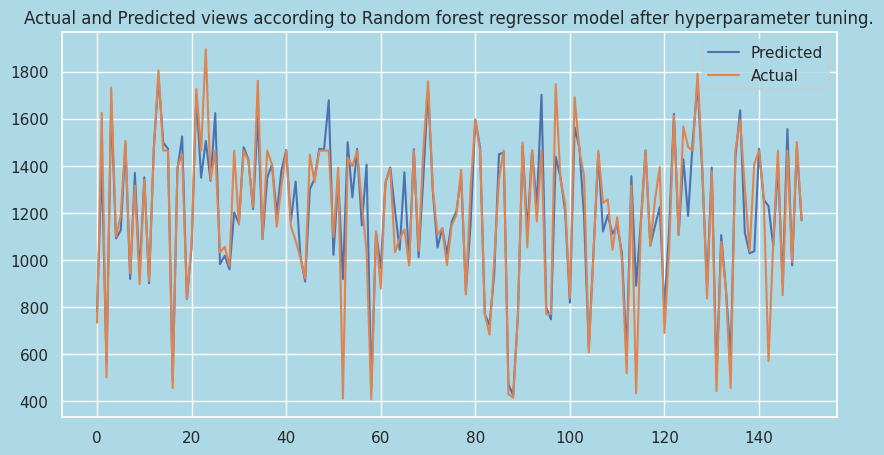

In [161]:
# visualisation of predicted and actual.
plt.figure(figsize=(10,5))
plt.plot(y_pred[:150])
plt.plot(np.array(y_test[:150]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted views according to Random forest regressor model after hyperparameter tuning.')
plt.show()

Feature Importance Just like decision tree, random forests also assign an "importance" to each feature, by combining the importance values from individual trees.

In [162]:
# Important features or coefficient of the model
optimal_model.feature_importances_

array([0.00209862, 0.05904823, 0.03309905, 0.01321291, 0.01672991,
       0.06383149, 0.01690445, 0.69307302, 0.10200234])

In [163]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': optimal_model.feature_importances_
}).sort_values('importance', ascending=False)

Text(0.5, 1.0, 'Feature Importance')

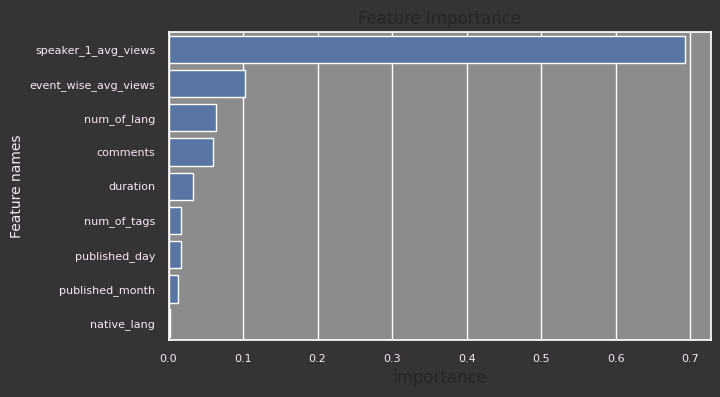

In [164]:
# Visualize the Feature Importance on bar plot.
fig, ax = plt.subplots(figsize=(7,4),facecolor="#363336")
ax.patch.set_facecolor('#8C8C8C')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=8)
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=8)
# ax.set_xlabel(feature, color='#F5E9F5', fontsize=20)
ax.set_ylabel("Feature names",  color='#F5E9F5', fontsize=10)

plt.title('Feature Importance')

###**ML Model - 3**
###**XGB Regressor**

In [165]:
# Initialising the XGB Regressor model.
xgb_reg = xgb.XGBRegressor()

In [166]:
# fitting the model on training data.
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [167]:
# test data prediction.
xgb_y_pred = xgb_reg.predict(X_test)

In [168]:
# Evaluating the perfomance of the model.
mse = mean_squared_error(y_test, xgb_y_pred)
r2 = r2_score(y_test, xgb_y_pred)
adjusted_r2 = 1 - (1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X.shape[1]-1))
print("MSE:", mse)
print("R2:", r2)
print("Adjusted R2: ", adjusted_r2)

MSE: 20341.874311217693
R2: 0.835511877749554
Adjusted R2:  0.8336403314786893


####Cross validation and hyperparameter tuning.

In [169]:
# Hyperparameter distribution for XGBoost Regressorr.
# Number of trees
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [170]:
# Initializing the XGBoost Regressor model.
base_xgb_reg = xgb.XGBRegressor(learning_rate = 0.1)

In [171]:
# Randomized Search Cross-Validation
#RandomSearch
xgb_random = RandomizedSearchCV(base_xgb_reg,param_dict,verbose=2,cv=5)
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.3s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.3s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.2s
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=80; total time=   0.3s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.3s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.3s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.3s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=150, n_estimators=100; total time=   0.4s
[CV] END max_dept

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   verbose=2)

In [172]:
# XGB optimal model.
xgb_optimal_model = xgb_random.best_estimator_

xgb_optimal_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, min_samples_leaf=50, min_samples_split=50,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=100, n_jobs=None, ...)

In [173]:
# prediction for testing data.
y_pred_xgb = xgb_optimal_model.predict(X_test)

####Model Evaluation.

In [174]:
# evaluating the model through mean squarred error, r squared and adjusted r squared.
MSE = mean_squared_error(y_test,y_pred_xgb)
R2 = r2_score(y_test,y_pred_xgb)
adjusted_r2 = 1 - (1-R2)*((X_test.shape[0]-1)/(X_test.shape[0]-X.shape[1]-1))
RMSE = np.sqrt(MSE)
print("MSE: ",MSE)
print("RMSE:", RMSE)
print("R2: ",R2)
print("Adjusted R2: ",adjusted_r2)

MSE:  18335.483573744794
RMSE: 135.4085801334051
R2:  0.8517359208174835
Adjusted R2:  0.8500489717496673


In [175]:
# Model df.
model_dict  = {'Model Name':['Linear Regression', 'Randomforest Regressor', 'XGB Regressor'],
               'MSE': [22107, 17151, 17732],
               'R2': [0.82, 0.86, 0.85],
               'Adjusted R2': [0.81, 0.86, 0.85]}

model_df = pd.DataFrame(model_dict)

model_df

,Model Name,MSE,R2,Adjusted R2
0,Linear Regression,22107,0.82,0.81
1,Randomforest Regressor,17151,0.86,0.86
2,XGB Regressor,17732,0.85,0.85


In [176]:
# importing pickle and making the pickle file of the model.
import pickle
with open('RFregressor.pkl', 'wb') as file:
  pickle.dump(optimal_model, file)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I will consider mean squared error, r2 and adjusted r2 as my evaluation metrics, beacause sum of squared errors gives the distance from the actual data point to the predicted data point. If we can get the mean of that sum of squared error we'll get the best fit line or better predictions. Sometimes R squared doesn't give a satisfactory score that is why i also considerd adjust R squared as my  evaluation metrics.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I've choosed the randomforest regressor model from the above created model. Beacause in linear regression and xgb model i got the highest mean squared error as compared to randomforest model. If i talk about the r2 and adjusted r2 score then again randomforest model performed well as compared to other two models.

# **Conclusion**

###I did a lot of hard work, from loading a datset to making the best model. Which includes Exploratory data analysis, data cleaning, feature engineering and ml model building.

###I've modelled on :-
* **Simple linear regression**
* **Lasso Regressor**
* **Randomforest Regressor**
* **XGB Regressor**


### My model is able to predict views correctly  90% of the time. Given that model has 10% errors, my models have performed very well on unseen data due to various factors like feature selection,correct model selection,etc.

###Out of all these models RandomForestRegressor is the best performer in terms of MSE, R2 and Adjusted R2.
###In all the features speaker_wise_avg_views is most important this implies that speakers are directly impacting the views.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***